## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade |
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [22]:
import pandas as pd

import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt


boston = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
X = boston.drop('medv', axis=1).copy()
y = boston[['medv']]

In [4]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [5]:
y.head()

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [11]:
tree = DecisionTreeRegressor(max_depth=2).fit(X_train, y_train)

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [12]:
path = tree.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([ 0.        ,  5.1641668 , 13.4547042 , 37.42402445]),
 'impurities': array([21.11896385, 26.28313065, 39.73783485, 77.1618593 ])}

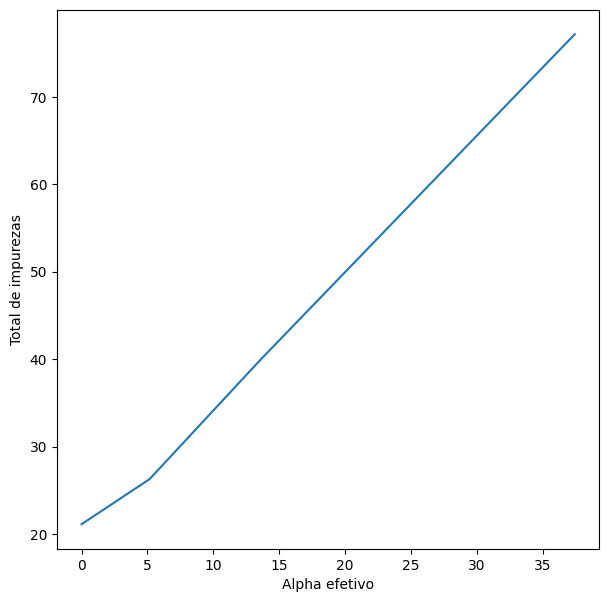

In [18]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(7,7))
plt.plot(ccp_alphas, impurities)
plt.xlabel('Alpha efetivo')
plt.ylabel('Total de impurezas')
plt.show()

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [19]:
trees = []

for ccp_alpha in ccp_alphas:
  tree = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
  tree.fit(X_train, y_train)
  trees.append(tree)


In [20]:
trees

[DecisionTreeRegressor(random_state=0),
 DecisionTreeRegressor(ccp_alpha=5.164166801183865, random_state=0),
 DecisionTreeRegressor(ccp_alpha=13.454704198686361, random_state=0),
 DecisionTreeRegressor(ccp_alpha=37.42402444694579, random_state=0)]

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [23]:
train_score = [mean_squared_error(y_train, tree.predict(X_train)) for tree in trees]
test_score = [mean_squared_error(y_test, tree.predict(X_test)) for tree in trees]

In [30]:
train_score[1:], test_score[1:]

([26.28313065405787, 39.73783485274442, 77.16185929969038],
 [47.76434592552134, 64.24541146746807, 101.33840831850766])

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

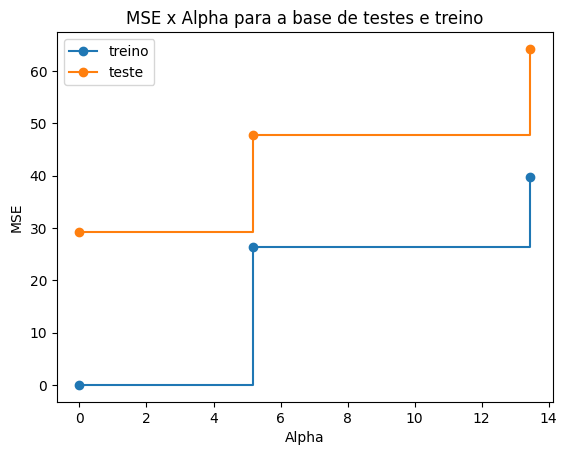

In [32]:
fig, ax = plt.subplots()

ax.set_xlabel('Alpha')
ax.set_ylabel('MSE')
ax.set_title('MSE x Alpha para a base de testes e treino')
ax.plot(ccp_alphas[:-1], train_score[:-1], marker='o', label='treino', drawstyle=('steps-post'))
ax.plot(ccp_alphas[:-1], test_score[:-1], marker='o', label='teste', drawstyle=('steps-post'))
plt.legend()
plt.show()

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [39]:
final_tree = DecisionTreeRegressor(random_state=0, ccp_alpha=10).fit(X_train, y_train)
print(f'R-quadrado: {final_tree.score(X_test, y_test)}')

R-quadrado: 0.5284161644248053


### 7. Visualize esta árvore.

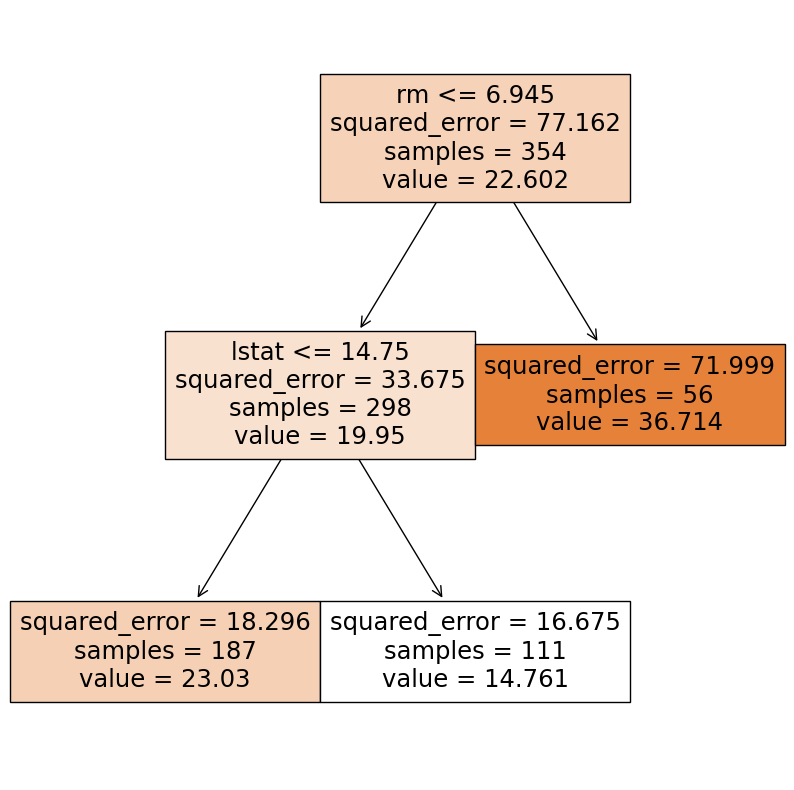

In [40]:
plt.rc('figure', figsize=(10, 10))
tree.plot_tree(final_tree, feature_names=X.columns, filled=True)
plt.show()